In [1]:
import pandas as pd
from modules import *

# Comando para ignorar os UserWarning dados pelo Pyhton
import warnings
warnings.filterwarnings('ignore')


file = "leituras-janeiro2002-agosto2024.xlsx"
registrationsSheet = "Cadastro Agosto2024"
measuresSheet = "Resumo"
df_global = readSheets(file=file,sheetNames=[registrationsSheet,measuresSheet])
cadastro = df_global[registrationsSheet].copy(deep=True)
leituras = df_global[measuresSheet].copy(deep=True)
columnsRegistrations = list(cadastro.columns)
columnsMeasures = list(leituras.columns)



Abrindo o arquivo leituras-janeiro2002-agosto2024.xlsx
Esse processo pode demorar 1 ou 2 minutos...
Lendo as planilhas ['Cadastro Agosto2024', 'Resumo'] do arquivo leituras-janeiro2002-agosto2024.xlsx
O arquivo foi importado com sucesso.


Não há leituras para AGLBRMNA003 (seco)
Não há leituras para AGLBRMNA004 (seco)


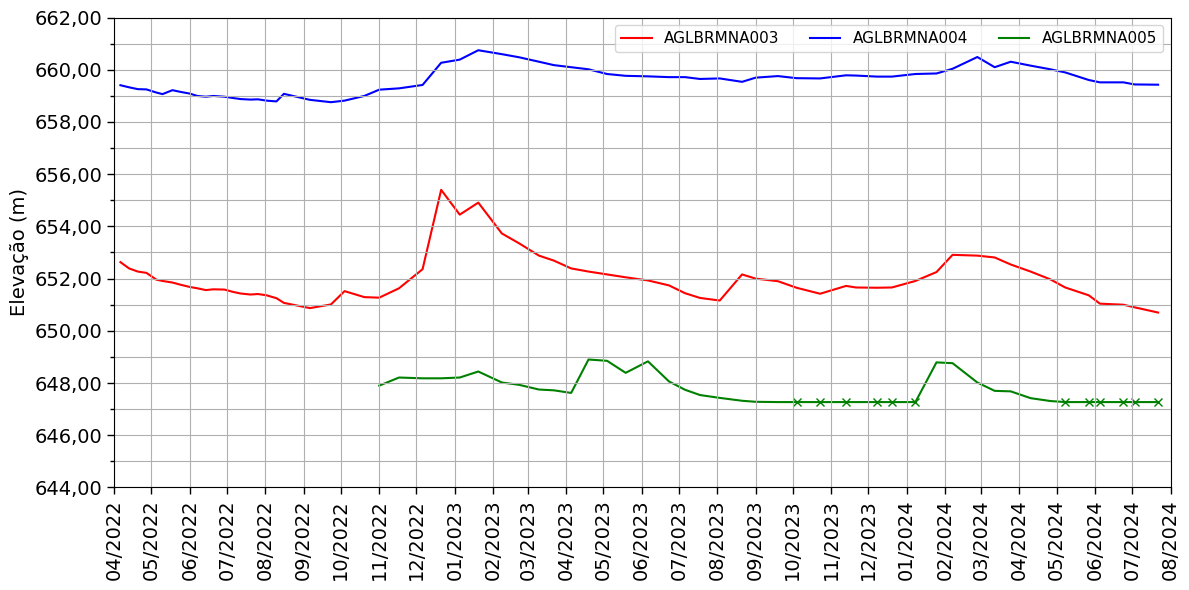

In [6]:
def fromDataToSerie(nomeInstrumento,df,seco=False,type="plot",label=None,color=None,toSecundary=False,showLegend=True,setup=dict()):
    dados = tratarDados(nomeInstrumento,df,seco=seco)
    dados = dados.reset_index()
    if seco:
        nomeInstrumento+=" (seco)"
    # print(dados)
    X = dados.loc[:,columnData]
    if len(X)==0:
        print(f"Não há leituras para {nomeInstrumento}")
        return
    Y = dados.loc[:,nomeInstrumento]
    return Serie(X,Y,type,label,color,toSecundary,showLegend,setup)

colors = [
    "red",
    "blue",
    "green"
]
series = []
instrumentos = [
    "AGLBRMNA003",
    "AGLBRMNA004",
    "AGLBRMNA005"
]
i = 0
for inst in instrumentos:
    serie = fromDataToSerie(inst,leituras,label=inst,color=colors[i])
    if not Serie==None:
        series.append(serie)
    i+=1

instrumentosSecos = instrumentos[:]
i = 0
for inst in instrumentos:
    serie = fromDataToSerie(inst,leituras,label=inst,seco=True,color=colors[i],showLegend=False,setup=dict(marker="x",linestyle=""))
    if not serie==None:
        series.append(serie)
    i+=1

xlim = (pd.Timestamp('04-01-2022'),pd.Timestamp('08-01-2024'))

setup=dict(xlim=xlim,xMajorLocator=MonthLocator(interval=1),xMinorLocator=MonthLocator(interval=1))

Graphic(series,setup=setup).render()

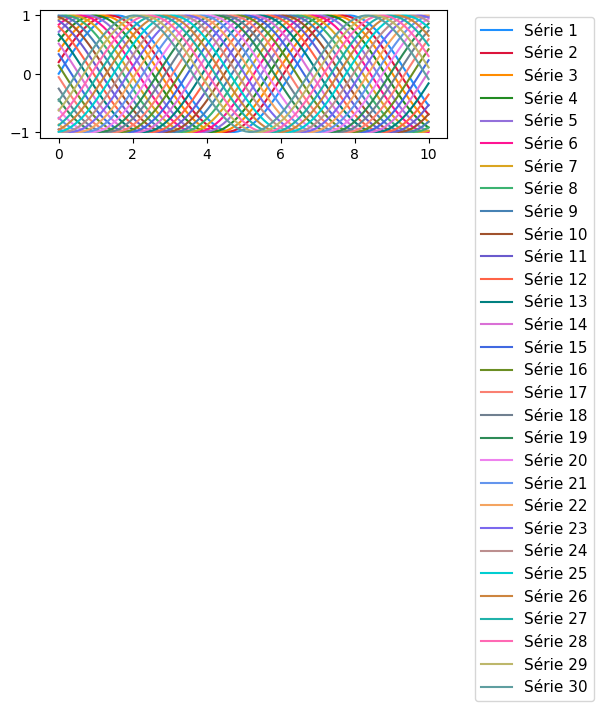

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de 30 cores
colors = [
    "#1E90FF", "#DC143C", "#FF8C00", "#228B22", "#9370DB", "#FF1493",
    "#DAA520", "#3CB371", "#4682B4", "#A0522D", "#6A5ACD", "#FF6347",
    "#008080", "#DA70D6", "#4169E1", "#6B8E23", "#FA8072", "#708090",
    "#2E8B57", "#EE82EE", "#6495ED", "#F4A460", "#7B68EE", "#BC8F8F",
    "#00CED1", "#CD853F", "#20B2AA", "#FF69B4", "#BDB76B", "#5F9EA0"
]

# Gerando dados fictícios para 30 séries
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()

for i in range(30):
    y = np.sin(x + i * 0.2)  # Cada série com um deslocamento
    ax.plot(x, y, color=colors[i], label=f'Série {i+1}')

# Legenda e exibição do gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
